# working notebook

### Utility Functions:
- load_bitcoin_edge_data(filename)
- user_activity_dataframe(bitcoin_df) <-- uses user_stats(bitcoin_df)
- build_graph(bitcoin_df, user_lst=[], rating_type='all', maxdate='2016-01-24')
#### visualization functions:
- plot_timeline(bitcoin_df, title)
- add_user_to_graph(existing_graph, new_user, bitcoin_df)

### EDA Learnings:
alpha network does not have time level timestamp so cannot do velocity or bot analysis
or sort chronologically within a day

### Interesting Fraud Examples:
otc_user = '2680'

In [1]:
import pandas as pd
import numpy as np
import datetime
import networkx as nx

import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../src')
import helpers as h
import visualizations as v
import model as m

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [2]:
# Load and preprocess data
otc_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinotc.csv.gz')
alpha_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinalpha.csv.gz')
alpha_users = h.user_activity_dataframe(alpha_df)
otc_users = h.user_activity_dataframe(otc_df)

In [3]:
# Load graph objects
_ , alpha_G = h.build_graph(alpha_df)
_ , alpha_pos_G = h.build_graph(alpha_df, rating_type='pos')
_ , otc_G = h.build_graph(otc_df)
_ , otc_pos_G = h.build_graph(otc_df, rating_type='pos')

In [ ]:
v.plot_timeline(alpha_df, 'Alpha Bit Coin Ratings Activity')

In [ ]:
v.plot_timeline(otc_df, 'OTC Bit Coin Ratings Activity')

## Networkx Functions

In [ ]:
alpha_GU = alpha_G.to_undirected()
nx.number_of_cliques(alpha_GU, nodes=7551)

In [ ]:
## Run the triadic census
census = nx.triadic_census(alpha_G)
census

In [ ]:
# triad generator
triads = all_triads(alpha_G)

In [ ]:
node_census = nx.triads_by_type(alpha_G)

In [ ]:
keys=node_census.values()[1].keys() 

## Generate a table header
print('| Node |', ' | '.join(keys))
for k in node_census.keys(): 
     print('|', k, '|',' | '.join([str(v) for v in node_census[k].values()]))


In [ ]:
node_census

In [ ]:
len(census)

In [ ]:
# Connected_component_subgraphs() returns a list of components,
# sorted largest to smallest
components=nx.connected_component_subgraphs(alpha_G)
# pick the first and largest component
cc = components[0]

In [ ]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(alpha_G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

sorted(map(sorted, top_level_communities))



The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed and the result can be depicted as a dendrogram.

In [ ]:
import networkx.generators.small

g = networkx.generators.small.krackhardt_kite_graph()

g.adjacency_list()

In [ ]:
otc_users[otc_users['BotActivity']==True].sort_values('TimeActive')

# Need to create visualization to Define Bot acitivity
In Alpha network only bot activity is with zero time delay - all same day raters
In OTC network only 18 users have zero time delay, however, XXX
users have delay under 1? minute (what is delay )

need 3 eda plots of same day rater distribution - day by hour, hour by minute, minute by second

In [ ]:
print(f"Alpha Bot users: {alpha_users['BotActivity'].sum()}")
print(f"OTC Bot users: {otc_users['BotActivity'].sum()}")

# Prediction Visualizations

In [31]:
df = pd.read_csv("../data/alpha_with_ratee_stats.csv")

In [29]:
df_ato = m.feature_iteration_ato(alpha_df)

In [32]:
df_ato.reset_index(drop=True, inplace=True)
df_ato.head()

,rater,ratee,rating,date,days_since_last_active,successive_neg_rating
0,2,402,1,2010-11-07 21:00:00,0.0,0.0
1,113,54,4,2010-11-07 21:00:00,0.0,0.0
2,10,970,8,2010-11-07 21:00:00,0.0,0.0
3,10,271,8,2010-11-07 21:00:00,0.0,0.0
4,119,54,5,2010-11-09 21:00:00,2.0,0.0


In [33]:
df = pd.concat([df, df_ato], axis=1)

In [23]:
df.head()

,rater,ratee,rating,date,class,binomial_rating,color,penwidth,num_ratings_received,num_neg_received,num_pos_received,neg_ratings_pct,rating_sum,days_active,cluster_coef,num_cliques,index,rater,ratee,rating,date,days_since_last_active,successive_neg_rating
0,2,402,1,2010-11-07 21:00:00,0,1,blue,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1276,2,402,1,2010-11-07 21:00:00,0.0,0.0
1,113,54,4,2010-11-07 21:00:00,0,1,blue,3,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,10469,113,54,4,2010-11-07 21:00:00,0.0,0.0
2,10,970,8,2010-11-07 21:00:00,0,1,blue,4,1.0,0.0,1.0,0.0,8.0,0.0,0.0,1.0,4004,10,970,8,2010-11-07 21:00:00,0.0,0.0
3,10,271,8,2010-11-07 21:00:00,0,1,blue,4,1.0,0.0,1.0,0.0,8.0,0.0,0.0,1.0,4005,10,271,8,2010-11-07 21:00:00,0.0,0.0
4,119,54,5,2010-11-09 21:00:00,0,1,blue,3,2.0,0.0,2.0,0.0,9.0,2.0,0.0,2.0,10468,119,54,5,2010-11-09 21:00:00,2.0,0.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24186 entries, 0 to 24185
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   rater                   24186 non-null  int64         
 1   ratee                   24186 non-null  int64         
 2   rating                  24186 non-null  int64         
 3   date                    24186 non-null  object        
 4   class                   24186 non-null  int64         
 5   binomial_rating         24186 non-null  int64         
 6   color                   24186 non-null  object        
 7   penwidth                24186 non-null  int64         
 8   num_ratings_received    24186 non-null  float64       
 9   num_neg_received        24186 non-null  float64       
 10  num_pos_received        24186 non-null  float64       
 11  neg_ratings_pct         24186 non-null  float64       
 12  rating_sum              24186 non-null  float6

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
X = df.copy()
X = X.drop(['rater', 'ratee', 'rating','date', 'color', 'penwidth', 'binomial_rating'], axis=1)
y = X.pop('class')


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle=True,
                                                    random_state=123)

RF = RandomForestClassifier(n_jobs=-1, random_state=123)
RF.fit(X_train, y_train)
y_preds = RF.predict(X_test)
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)

# print(X_test[(y_preds==0) & (X_test['num_neg_received']>0)].head(10))
print(recall)
print(precision)
RF.feature_importances_
 

0.6432291666666666
0.8233333333333334


array([0.06977121, 0.04225398, 0.08302551, 0.09940754, 0.19227782,
       0.11471773, 0.08927789, 0.10333505, 0.11625468, 0.08967858])

Text(0.5,1,'Random Forest feature importance')

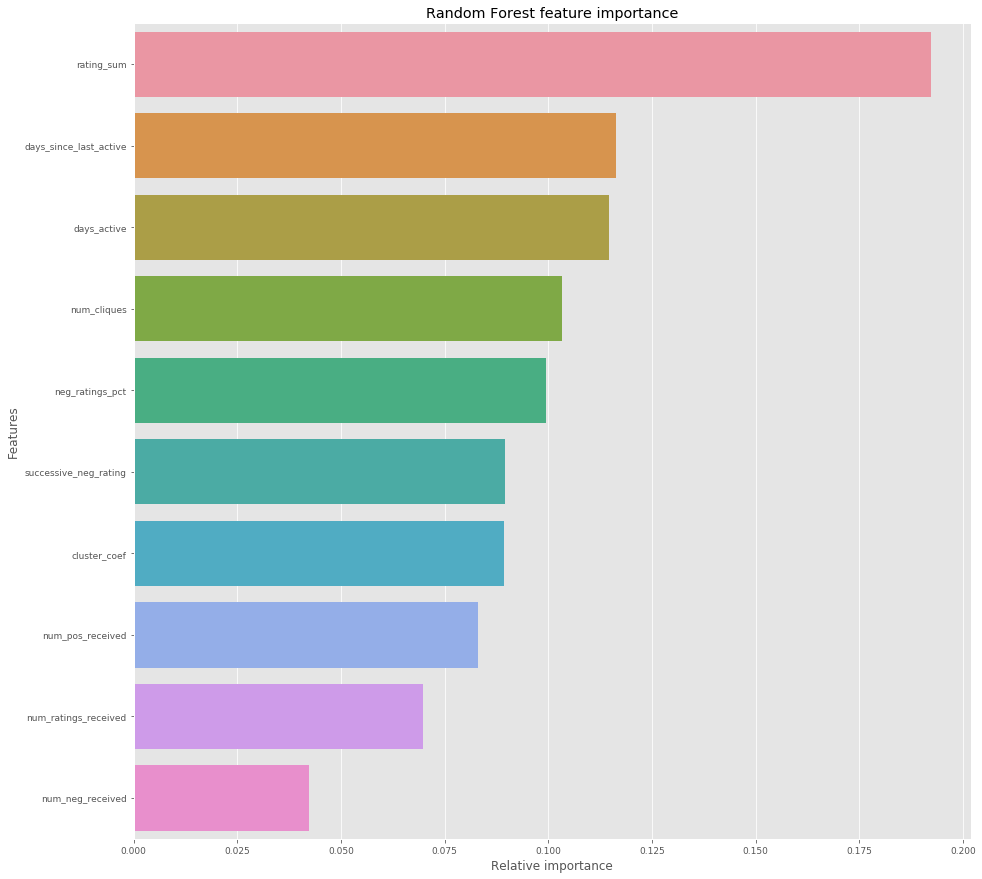

In [35]:
import seaborn as sns
fig = plt.figure(figsize=(15,15))

name = "Random Forest"
indices = np.argsort(RF.feature_importances_)[::-1][:40]
ax1 = sns.barplot(y=X_train.columns[indices][:40],x = RF.feature_importances_[indices][:40] , orient='h')
ax1.set_xlabel("Relative importance",fontsize=12)
ax1.set_ylabel("Features",fontsize=12)
ax1.tick_params(labelsize=9)
ax1.set_title(name + " feature importance")

### Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix

thresh = 0.5
pred_proba = RF.predict_proba(X_test)[:,1]
cnf_matrix = confusion_matrix(y_test, pred_proba>=thresh)
print(cnf_matrix)
tn, fp, fn, tp = cnf_matrix.ravel()
tn, fp, fn, tp
neg = tn + fp
pos = fn + tp
tnpct = tn/neg
fppct = fp/neg
fnpct = fn/pos
tppct = tp/pos
cnt_matrix_pct = np.round(np.array([tnpct,fppct,fnpct, tppct]), 2)
cnt_matrix_pct.reshape((2,2))

[[5609   54]
 [ 135  249]]


array([[0.99, 0.01],
       [0.35, 0.65]])

In [77]:
df.iloc[y_test-y_preds].shape

(6047, 22)

In [82]:
y_test-y_preds

3203     0
22765    1
1540     0
9890     0
8930     0
        ..
6730     0
15257    0
22146    0
2237     0
23388    0
Name: class, Length: 6047, dtype: int64

In [64]:
X_test.loc[22765]

num_ratings_received       13.000000
num_neg_received            3.000000
num_pos_received           10.000000
neg_ratings_pct             0.230769
rating_sum                  6.000000
days_active               486.000000
cluster_coef                0.119536
num_cliques                30.000000
days_since_last_active      3.000000
successive_neg_rating       1.000000
Name: 22765, dtype: float64

In [66]:
df.loc[22765]

rater                                     222
ratee                                    2336
rating                                    -10
date                      2014-07-19 21:00:00
class                                       1
binomial_rating                            -1
color                                     red
penwidth                                    4
num_ratings_received                       13
num_neg_received                            3
num_pos_received                           10
neg_ratings_pct                      0.230769
rating_sum                                  6
days_active                               486
cluster_coef                         0.119536
num_cliques                                30
rater                                     222
ratee                                    2336
rating                                    -10
date                      2014-07-19 21:00:00
days_since_last_active                      3
successive_neg_rating             

In [61]:
for input, prediction, label in zip(X_test, y_preds, y_test):
    if prediction != label:
        print(input, 'has been classified as ', prediction, 'and should be ', label) 

num_neg_received has been classified as  0 and should be  1


In [ ]:
def plot_confusion_matrix(ax, cm, title, classes=['Legitimate','Fraud'],
                          cmap=plt.cm.Blues, currency=False):
    """
    Plots a single confusion matrix. If currency=True then displays results as currency.

    Parameters
    ----------
    cm: array (confusion matrix)
    title: String
    test_size: float - size/percentage of holout dataset
    goal: float - project goal for ultimate dollar loss rate

    Returns
    -------
    """   
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        cost=cm[i, j]
        if currency:
            cost = f'${cost:0,.2f}' 
        ax.text(j, i, cost, horizontalalignment="center", 
        color="white" if cm[i, j] > thresh else "black")
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    if currency:
        ax.set_title(f'{title}\nCost Matrix')
    else:
        ax.set_title(f'{title}\nConfusion Matrix')
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=0)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, rotation=90)

    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')    



In [ ]:
import itertools
fig, ax = plt.subplots()
plot_confusion_matrix(ax, cnf_matrix, "test", classes=['Pos Rating','Neg Rating'])

In [ ]:
from sklearn.metrics import precision_recall_curve

# Make function for indivisual plot and then you can call it over and over
def Plot_PR_Curve(X, y):
    '''
    Calculates and Plots PR Curve and puts threshold marker on curve.
    '''
    # get points to plot on the PR Curve
    thresh = 0.5
    precision, recall, thresholds = precision_recall_curve(y, pred_proba) 
        
    # find the index of the record with closest threshold to desired threshold value
    threshold_idx = np.argmin(np.abs(thresholds-thresh))
    
    plt.plot(precision, recall)
    plt.plot(precision, threshold_idx, recall, threshold_idx, 'o', 
             markersize=10, fillstyle='full', 
             label="{thresh:.2f} threshold", mew=2)

    plt.legend(loc='center', frameon=False)
    plt.title('Precision-Recall Curve Comparison')    
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.xlim(xmin=-0.05,xmax=1.05);
    plt.ylim(ymin=-0.05,ymax=1.05);  

In [ ]:
Plot_PR_Curve(X_test, y_test)

## Node2vec

In [ ]:
# embedding dimension to 14, the number of walks to 25, and the number of iterations to 15.

from node2vec import Node2Vec

# Precompute probabilities and generate walks
# node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
node2vec = Node2Vec(G, dimensions=14, walk_length=30, num_walks=25, workers=4)

# Embed
# windows is the number of max distance from the node that the vector is going to be based on
# maybe i can move this to 1 or 2??
model = node2vec.fit(window=5, min_count=1)#, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model.wv.most_similar('2')  # Output node names are always strings

# giving me 10 most similar to user
user = '1006'
model.wv.most_similar(user) 

# gives 64 length vector for user
vector = model.wv[user]
print(vector)

embeddingsframe = pd.DataFrame(model.get_embedding())

n = [] # node list?
e = [] # embeddings list

with open('./trimmed_network.emb') as fin:
    for line in model:
        node_emb = line.strip().split()  # turns into a list and removes white spaces at beginning and ending of string
        n.append(node_emb[0])
        e.append(node_emb[1:])

n = n[1:]
n = [int(i) for i in n] #  converts node to an int datatype
embs = np.zeros([len(e)-1,14])
for i in range(1,len(e)):
    embs[i-1] = e[i]
embs.shape

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

## Velocity

In [42]:
alpha_df.groupby(['rater', 'date'])['rating'].count().sort_values(ascending=False)

rater  date               
7603   2012-05-23 21:00:00    22
185    2013-09-30 21:00:00    20
7564   2011-06-08 21:00:00    20
13     2012-11-06 21:00:00    19
94     2014-04-10 21:00:00    16
                              ..
553    2013-04-01 21:00:00     1
       2013-02-17 21:00:00     1
       2013-01-20 21:00:00     1
       2012-12-16 21:00:00     1
1      2010-11-28 21:00:00     1
Name: rating, Length: 18584, dtype: int64

In [46]:
alpha_df[(alpha_df['rater']==185) | (alpha_df['ratee']==185)]

,rater,ratee,rating,date,class,binomial_rating,color,penwidth
10529,185,55,8,2012-03-06 21:00:00,0,1,blue,4
10557,55,185,8,2012-03-06 21:00:00,0,1,blue,4
3700,185,9,-3,2012-03-15 21:00:00,1,-1,red,2
17404,185,582,1,2012-03-15 21:00:00,0,1,blue,1
17390,687,185,1,2012-03-15 21:00:00,0,1,blue,1
8826,185,37,3,2012-04-22 21:00:00,0,1,blue,2
17397,185,7562,3,2012-04-22 21:00:00,0,1,blue,2
17399,185,1691,2,2012-04-22 21:00:00,0,1,blue,2
10200,185,51,2,2012-04-22 21:00:00,0,1,blue,2
17400,185,687,2,2012-04-22 21:00:00,0,1,blue,2


# new collusion feature

In [ ]:
def update_bitcoin_df_attibutes
    

In [ ]:
def feature_creation_collusion2(bitcoin_df, user, rate_date):
    """ Returns array containing predictive features for 
    an individual bitcoin rating.
    Input: 
        bitcoin_df:  Dataframe containing bitcoin ratings as edges
        user: int
        rate_date: date used for feature generation
    Output:
        array
    """
    df = bitcoin_df.copy()
    user_data_in = df[(df['ratee']==user) & ((df['date'] < rate_date) | ((df['date']==rate_date) & (df['rating'] > 0)))]
    if len(user_data_in)==0:
        return np.zeros(8)
    
    
    num_ratings_received = len(user_data_in)
    num_neg_received = user_data_in['class'].sum()
    num_pos_received = num_ratings_received - num_neg_received
    neg_ratings_pct = num_neg_received / num_ratings_received
    rating_sum = user_data_in['rating'].sum()
    days_active = (rate_date - user_data_in['date'].min()).days
    _, g = h.build_graph(df, maxdate=rate_date)
    cluster_coef = nx.clustering(g, user)
    g = g.to_undirected()
    num_cliques = nx.number_of_cliques(g, user)

    A = np.array([num_ratings_received, num_neg_received, num_pos_received, 
                  neg_ratings_pct, rating_sum, days_active, cluster_coef, num_cliques])
    A[np.isnan(A)] = 0
    return A